In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
import re    #for regex
import string
import re    #for regex
import nltk
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D,SpatialDropout1D,GlobalAveragePooling1D, LSTM, SimpleRNN

In [7]:
train = pd.read_csv('G:/toxic_detector_final.csv',usecols =["comment_text","Toxic"])

In [8]:
train

,comment_text,Toxic
0,They were warning SantiLak in August. Notice ...,0
1,one last comment \n\nI notice there is a stron...,0
2,Fair point. Thanks.66.87.143.199,0
3,Yes there is almost total overlap71.208.252.27,0
4,Stop Wiki-stalking me \nSome of my changes wer...,0
...,...,...
39059,Just one final word for you assholes.. landing...,1
39060,Fuck you so fuck you and everybody who looks l...,1
39061,I hope you're on the next plane just so we can...,1
39062,You're a dishonest asshole that will never tou...,1


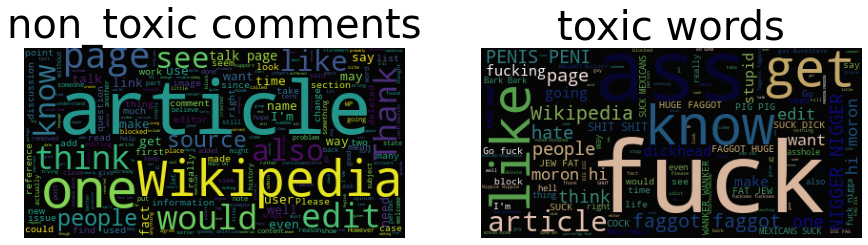

In [12]:
'''wordcloud visualisation to check the most common words in clean and toxic comments'''
#wordcloud for clean comments
plt.figure(figsize=(15, 5))
plt.subplot(121)
stopword = set(stopwords.words("english"))
subset=train[train.Toxic==0]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=500,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("non_toxic comments", fontsize=40)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)

'''frequent words in toxic comments'''
plt.subplot(122)
subset=train[train.Toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=500,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("toxic words", fontsize=40)
plt.imshow(wc.recolor(colormap= 'gist_earth'), alpha=0.98)

In [13]:
clean = {
"aren't" : "are not",
"can't" : "can not",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [14]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = [clean[word] if word in clean else word for word in text.split()] 
    
   
    
    return text

In [15]:
train['comment_text_clean'] = train['comment_text'].apply(lambda x: clean_text(x))

In [16]:
x=train["comment_text_clean"]
y=train["Toxic"]

In [17]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [18]:
max_feature = 7000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [19]:
import pickle#store token
with open('tokenizer.pickle2', 'wb') as f2:
    pickle.dump(tokenizer, f2)

In [20]:
sequences = tokenizer.texts_to_sequences(train_x)

In [21]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 300)

In [22]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=300)

In [23]:
model_simple_rnn = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 300),
                                 tf.keras.layers.SimpleRNN(64),
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_simple_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           448000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 456,321
Trainable params: 456,321
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_simple_rnn.compile(loss = "binary_crossentropy",
                 optimizer = 'adam',
                 metrics= ["accuracy"])

In [25]:
history = model_simple_rnn.fit(
    pad_sequences,train_y,
    batch_size= 128,
    epochs= 10,
    validation_split= 0.1,
    verbose=1,shuffle=True
)

Epoch 1/10
220/220 [==============================] - 125s 553ms/step - loss: 0.4475 - accuracy: 0.7861 - val_loss: 0.3315 - val_accuracy: 0.8602
Epoch 2/10
220/220 [==============================] - 120s 547ms/step - loss: 0.2952 - accuracy: 0.8786 - val_loss: 0.4056 - val_accuracy: 0.8183
Epoch 3/10
220/220 [==============================] - 119s 542ms/step - loss: 0.2859 - accuracy: 0.8835 - val_loss: 0.3374 - val_accuracy: 0.8580
Epoch 4/10
220/220 [==============================] - 119s 540ms/step - loss: 0.2302 - accuracy: 0.9126 - val_loss: 0.3149 - val_accuracy: 0.8855
Epoch 5/10
220/220 [==============================] - 123s 560ms/step - loss: 0.1942 - accuracy: 0.9274 - val_loss: 0.3631 - val_accuracy: 0.8800
Epoch 6/10
220/220 [==============================] - 123s 561ms/step - loss: 0.1703 - accuracy: 0.9379 - val_loss: 0.3323 - val_accuracy: 0.8871
Epoch 7/10
220/220 [==============================] - 119s 542ms/step - loss: 0.1573 - accuracy: 0.9429 - val_loss: 0.3649 -

In [30]:

predictions = (model_simple_rnn.predict(x_testing) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.54      0.68      3998
           1       0.66      0.95      0.78      3815

    accuracy                           0.74      7813
   macro avg       0.79      0.75      0.73      7813
weighted avg       0.79      0.74      0.73      7813



In [35]:
model_simple_rnn = tf.keras.Sequential([tf.keras.layers.Embedding(max_feature,64,input_length = 300),
                                 tf.keras.layers.SimpleRNN(64),
                                 tf.keras.layers.Dropout(0.2),     
                                 tf.keras.layers.Dense(1, activation = "sigmoid")]
                                )

model_simple_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 64)           448000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 456,321
Trainable params: 456,321
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_simple_rnn.compile(loss = "binary_crossentropy",
                 optimizer = 'adam',
                 metrics= ["accuracy"])

In [37]:
history = model_simple_rnn.fit(
    pad_sequences,train_y,
    batch_size= 128,
    epochs= 10,
    validation_split= 0.1,
    verbose=1,shuffle=True
)

Epoch 1/10
220/220 [==============================] - 133s 596ms/step - loss: 0.4814 - accuracy: 0.7684 - val_loss: 0.3480 - val_accuracy: 0.8548
Epoch 2/10
220/220 [==============================] - 131s 597ms/step - loss: 0.3085 - accuracy: 0.8735 - val_loss: 0.2988 - val_accuracy: 0.8800
Epoch 3/10
220/220 [==============================] - 130s 590ms/step - loss: 0.2283 - accuracy: 0.9098 - val_loss: 0.3132 - val_accuracy: 0.8733
Epoch 4/10
220/220 [==============================] - 129s 585ms/step - loss: 0.1776 - accuracy: 0.9324 - val_loss: 0.3218 - val_accuracy: 0.8765
Epoch 5/10
220/220 [==============================] - 128s 582ms/step - loss: 0.1016 - accuracy: 0.9640 - val_loss: 0.3809 - val_accuracy: 0.8650
Epoch 6/10
220/220 [==============================] - 128s 581ms/step - loss: 0.1640 - accuracy: 0.9417 - val_loss: 0.3540 - val_accuracy: 0.8698
Epoch 7/10
220/220 [==============================] - 129s 586ms/step - loss: 0.2299 - accuracy: 0.9116 - val_loss: 0.3329 -

In [38]:
predictions = (model_simple_rnn.predict(x_testing) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.91      0.86      3998
           1       0.89      0.77      0.83      3815

    accuracy                           0.84      7813
   macro avg       0.85      0.84      0.84      7813
weighted avg       0.85      0.84      0.84      7813



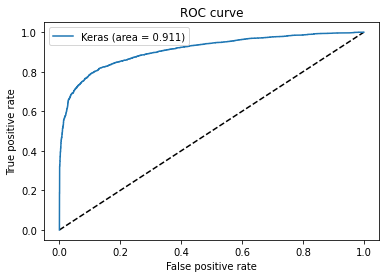

In [39]:
from sklearn.metrics import roc_curve
y_pred_keras =model_simple_rnn.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model 
new_model = tf.keras.models.load_model('Test_model_drop_out')

In [ ]:
import pickle
with open('tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)

In [ ]:
sample_text=["There isn't really much to say about this overly dumb and centrally propaganda set film except for it is god awful. It's stupidly incoherent, let alone not have any English subtitles to use. It also features some of the worst editing, cinematography and acting I've ever seen. This piece of nonsense propaganda for god knows what pretty much fails to do everything that propaganda should do; convince it's audience that the maker of such propaganda is the right person/ideology to follow."]
sequences = tokenizer.texts_to_sequences(sample_text)

In [ ]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 300)